##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Basics: Training Your First Model

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

最初の機械学習モデルをトレーニングするこのColabへようこそ！

ここでは、物事をシンプルに保ち、基本的な概念のみを紹介します。 後のコラボでは、より高度な問題を取り上げます。

解決する問題は、摂氏から華氏に変換することです。近似式は次のとおりです。

$$ f = c \times 1.8 + 32 $$


もちろん、この計算を直接実行する従来のPython関数を作成するのは十分簡単ですが、それは機械学習ではありません。


代わりに、TensorFlowにサンプルの摂氏値（0、8、15、22、38）とそれに対応する華氏値（32、46、59、72、100）を与えます。
次に、トレーニングプロセスを通じて上記の式を計算するモデルをトレーニングします。

## Import dependencies
まず、TensorFlowをインポートします。 ここでは、使いやすいように「tf」と呼んでいます。 また、エラーのみを表示するように指示します。

次に、 [NumPy](http://www.numpy.org/)を `np`としてインポートします。 Numpyは、パフォーマンスの高いリストとしてデータを表すのに役立ちます。

In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
# try:
#   # Use the %tensorflow_version magic if in colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass

import tensorflow as tf

In [4]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

前に見たように、教師あり機械学習とは、入力と出力のセットを与えられたアルゴリズムを見つけることです。 このCodelabのタスクは、摂氏で温度を指定すると華氏で温度を与えることができるモデルを作成することなので、モデルをトレーニングするために使用できる2つのリスト `celsius_q`と` fahrenheit_a`を作成します。

In [5]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Some Machine Learning terminology

 - **Features** —モデルへの入力。 この場合、単一の値—摂氏の度数。

 - **Labels** —モデルが予測する出力。 この場合、単一の値—華氏の度数。

 - **Example** —トレーニング中に使用される入力/出力のペア。 私たちの場合、特定のインデックス（ `（22,72）`など）にある `celsius_q`と` fahrenheit_a`の値のペア。

## Create the model

次に、モデルを作成します。 可能な限り単純なモデルである密なネットワークを使用します。 問題は単純なので、このネットワークには単一のニューロンを備えた単一のレイヤーのみが必要です。

### Build a layer

レイヤーを「l0」と呼び、次の設定で「tf.keras.layers.Dense」をインスタンス化して作成します。


*   `input_shape=[1]` — これは、このレイヤーへの入力が単一の値であることを指定します。 つまり、形状は、1つのメンバーを持つ1次元配列です。 これが最初の（そして唯一の）レイヤーであるため、その入力形状はモデル全体の入力形状です。 単一の値は、摂氏温度を表す浮動小数点数です。

*   `units=1` — これは、レイヤー内のニューロンの数を指定します。 ニューロンの数は、層が問題を解決する方法を学習しようとする内部変数の数を定義します（後で）。 これは最終層であるため、モデルの出力サイズ（華氏を表す単一の浮動小数点値）でもあります。 （多層ネットワークでは、レイヤーのサイズと形状は次のレイヤーの「input_shape」と一致する必要があります。）


In [6]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

レイヤーを定義したら、それらをモデルに組み立てる必要があります。 シーケンシャルモデル定義では、入力から出力までの計算順序を指定して、レイヤーのリストを引数として受け取ります。

このモデルには、単一のレイヤーl0のみがあります。

In [7]:
model = tf.keras.Sequential([l0])

**Note**

多くの場合、事前にではなく、モデル定義内に定義されたレイヤーが表示されます。

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

トレーニングの前に、モデルをコンパイルする必要があります。 トレーニング用にコンパイルすると、モデルは次のようになります。

- **Loss function(損失関数）** — 予測が望ましい結果からどれだけ離れているかを測定する方法。 （測定された差は「損失」と呼ばれます。）

- **Optimizer function(オプティマイザー機能)** — 損失を減らすために内部値を調整する方法。

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

これらはトレーニング中に使用され（ `model.fit（）`、以下）、最初に各ポイントで損失を計算し、次にそれを改善します。実際、モデルの現在の損失を計算し、それを改善するという行為は、まさにトレーニングと同じです。

トレーニング中、オプティマイザー機能を使用して、モデルの内部変数の調整を計算します。目標は、モデル（実際には数学関数）が摂氏から華氏に変換する実際の方程式を反映するまで、内部変数を調整することです。

TensorFlowは、数値分析を使用してこのチューニングを実行します。この複雑さはすべてユーザーに隠されているため、ここでは詳細を説明しません。これらのパラメーターについて知っておくと便利なのは次のとおりです。

損失関数（[平均二乗誤差](https://en.wikipedia.org/wiki/Mean_squared_error))およびオプティマイザー（[Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/))

ここで使用されているのは、このような単純なモデルの標準ですが、他の多くのモデルも利用可能です。この時点でこれらの特定の機能がどのように機能するかを知ることは重要ではありません。

独自のモデルを構築する際に考慮する必要があるかもしれないオプティマイザーの一部は、学習率（上記のコードでは `0.1`）です。これは、モデルの値を調整するときに取られるステップサイズです。値が小さすぎる場合、モデルをトレーニングするには反復が多すぎます。大きすぎると、精度が低下します。適切な値を見つけるには、多くの場合試行錯誤が伴いますが、範囲は通常0.001（デフォルト）から0.1までです。

## Train the model

`fit`メソッドを呼び出してモデルをトレーニングします。

トレーニング中、モデルは摂氏の値を取得し、現在の内部変数（「重み」と呼ばれる）を使用して計算を実行し、華氏に相当する値を出力します。 重みは最初はランダムに設定されるため、出力は正しい値に近くなりません。 実際の出力と目的の出力の差は損失関数を使用して計算され、オプティマイザー関数は重みの調整方法を指示します。

計算、比較、調整のこのサイクルは、 `fit`メソッドによって制御されます。 最初の引数は入力、2番目の引数は目的の出力です。 `epochs`引数はこのサイクルを実行する回数を指定し、` verbose`引数はメソッドが生成する出力の量を制御します。

In [12]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


後のビデオで、ここで実際に何が起こるか、および高密度レイヤーが実際に内部でどのように機能するかについて詳しく説明します。

## Display training statistics

`fit`メソッドは履歴オブジェクトを返します。 このオブジェクトを使用して、各トレーニングエポック後にモデルの損失がどのように低下するかをプロットできます。 損失が大きいということは、モデルが予測する華氏度が、「華氏_a」の対応する値からかけ離れていることを意味します。

[Matplotlib](https://matplotlib.org/)を使用してこれを視覚化します（別のツールを使用できます）。 ご覧のように、モデルは最初は非常に速く改善され、その後、最後に向かって「完全」に近くなるまで、安定したゆっくりした改善が見られます。

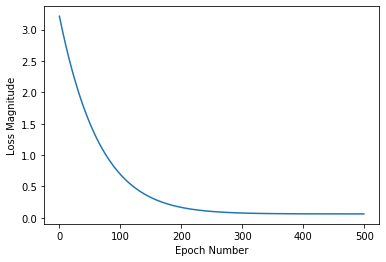

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

これで、 `celsius_q`と` fahrenheit_a`の関係を学習するように訓練されたモデルができました。 predictメソッドを使用して、未知の摂氏温度の華氏温度を計算することができます。

たとえば、摂氏の値が100の場合、華氏の結果はどうなると思いますか？ このコードを実行する前に推測してください。

In [15]:
print(model.predict([100.0]))

[[211.74562]]


正解は$100 \times 1.8 + 32 = 212$なので、このモデルは非常にうまく機能しています。

### レビューする

* 密なレイヤーを持つモデルを作成しました
* 3500の例（7ペア、500エポック以上）でトレーニングしました。

このモデルでは、任意の摂氏値に対して正しい華氏値を返すことができるようになるまで、高密度レイヤーの変数（重み）を調整しました。 （100摂氏はトレーニングデータの一部ではなかったことを思い出してください。）

## Looking at the layer weights

最後に、高密度レイヤーの内部変数を出力しましょう。

In [16]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7980499]], dtype=float32), array([31.940628], dtype=float32)]


最初の変数は〜1.8に近く、2番目の変数は〜32に近いです。 これらの値（1.8および32）は、実際の変換式の実際の変数です。

これは、変換式の値に本当に近いです。 これについては今後のビデオで説明しますが、ここでは高密度レイヤーの仕組みを説明していますが、単一の入力と単一の出力を持つ単一のニューロンの場合、内部の数学は[行の方程式](https：//en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form) 、$y = mx + b$。変換式$ f = 1.8c + 32 $と同じ形式です。

フォームは同じであるため、変数は標準値1.8および32に収束する必要があります。これはまさに起こったことです。

追加のニューロン、追加の入力、および追加の出力を使用すると、式ははるかに複雑になりますが、考え方は同じです。

### A little experiment

楽しみのために、異なるユニットでより多くの高密度レイヤーを作成した場合、どうしてより多くの変数があるのでしょうか？

In [17]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.7474]]
Model predicts that 100 degrees Celsius is: [[211.7474]] degrees Fahrenheit
These are the l0 variables: [array([[-0.00708664, -0.82004404, -0.14679568,  0.02422465]],
      dtype=float32), array([-0.55477583, -2.9173923 ,  2.7109592 , -1.6910136 ], dtype=float32)]
These are the l1 variables: [array([[ 0.17710061,  0.15622525, -0.5691614 ,  0.09313264],
       [-0.4036101 , -0.03733783, -0.9744834 ,  0.8566064 ],
       [ 0.53218895,  0.74963886,  0.6434186 , -0.8735762 ],
       [-0.6941218 , -0.23840295, -0.89607537,  0.3448845 ]],
      dtype=float32), array([ 2.8257515, -0.6575551,  2.9241438, -2.9050033], dtype=float32)]
These are the l2 variables: [array([[ 1.0474474 ],
       [ 0.10453831],
       [ 1.3472986 ],
       [-1.1216834 ]], dtype=float32), array([2.916228], dtype=float32)]


ご覧のように、このモデルは対応する華氏の値を非常によく予測することもできます。 しかし、 `l0`レイヤーと` l1`レイヤーの変数（重み）を見ると、〜1.8と〜32に近いものすらありません。 追加された複雑さは、変換方程式の「単純な」形式を隠します。

高密度レイヤーが説明のためにどのように機能するかについての今後のビデオをお楽しみに。